In [93]:
import torch
import torchvision

In [94]:
# dataset = 'knn_cub200'
dataset = 'knn_flowers102'
# dataset = 'knn_food101'
# dataset = 'knn'

In [95]:
neighbours_dict = {
  'imagenet':f'../dino/encoders/imagenet/checkpoint/{dataset}',
  'places':f'../dino/encoders/places/checkpoint/{dataset}',
  'fast2leaves_shaders_shaders_mixup-2-2-1':f'../dino/encoders/fast2leaves_shaders_shaders_mixup-2-2-1/checkpoint/{dataset}', #/nn_neighbors_all'
  'shaders_mixup':f'../dino/encoders/shaders_mixup/checkpoint/{dataset}', #/nn_neighbors_all'
  'stylegan':f'../dino/encoders/stylegan-oriented-512/checkpoint/{dataset}',
  'random':f'../dino/encoders/random/{dataset}' if dataset == 'knn' else f'../dino/encoders/random/checkpoint/{dataset}',
}

In [96]:
def transform(im, k=2, w=248):
  im = torchvision.transforms.ToTensor()(im)
  ims = torch.chunk(im, 6, 2)
  im = torch.cat(ims[:k+1], 1)
  im = torchvision.transforms.Resize((w*(k+1), w))(im)
  im = torchvision.transforms.ToPILImage()(im)
  return im

datasets_dict = {k:torchvision.datasets.ImageFolder(v, transform=transform) for k,v in neighbours_dict.items()}

In [97]:
# Food
# sample = '/1702.jpg'
# for i in range(len(datasets_dict['imagenet'])):
#   if sample in datasets_dict['imagenet'].samples[i][0]:
#     print(i)

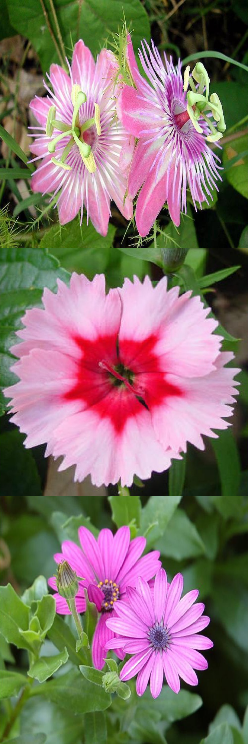

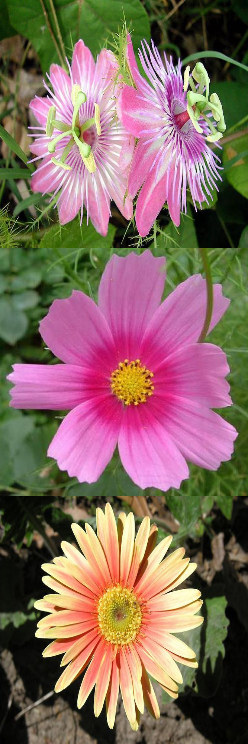

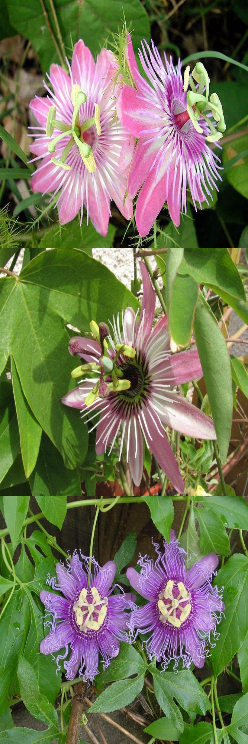

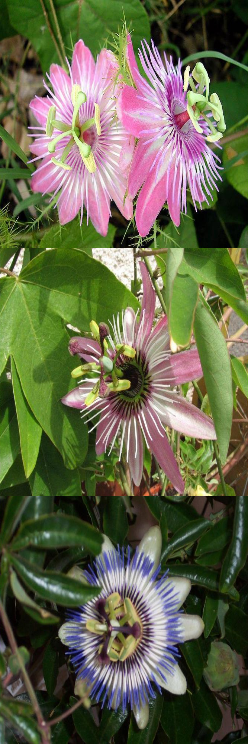

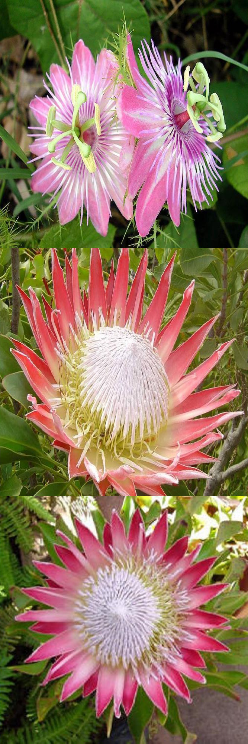

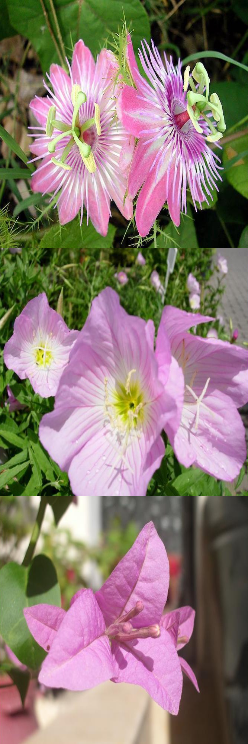

In [99]:
# idx = 10 # ImageNet
# idx = 1 # CUB
# idx = 95 # Food
idx = 1 # Flowers
display(datasets_dict['imagenet'][idx][0])
display(datasets_dict['places'][idx][0])
display(datasets_dict['fast2leaves_shaders_shaders_mixup-2-2-1'][idx][0])
display(datasets_dict['shaders_mixup'][idx][0])
display(datasets_dict['stylegan'][idx][0])
display(datasets_dict['random'][idx][0])